# Stock data analysis from yahoo finance

<img src="https://upload.wikimedia.org/wikipedia/en/archive/7/70/20191225000430%21Yahoo_Finance_Logo_2019.jpg"/>

In [2]:
import pandas as pd
import datetime as dt
from bokeh.plotting import figure, show, output_file
import matplotlib.pyplot as plt


# 1. Request headlines of news with keywords: stock and vaccine

The API we used is newsapi, firstly we got apiKey from there, and then do the request to find the most popular vaccine companies articles related with stock market.


In [ ]:
import requests
url = ('http://newsapi.org/v2/everything?'
       'qInTitle=+stock AND +vaccine&'
       'from=2020-07-01&'
       'sortBy=popularity&'
       'apiKey=3a2cbdaf087943ef9579d64b6fc30bb9')
response = requests.get(url)
print("status_code: "+str(response.status_code))
res_dict=response.json()
print('Headlines of news with keywords: stock and vaccine'+'\n')

for a in res_dict['articles']:
    print(a['title']+'\n')

# 2. Select top popular vaccine companies stock data, worldwide known companies stock data as contrast and S&P500, Nasdaq index data

 From the top popular articles we can see some of the most popular vaccine companies such as Moderna, Novavax, Pfizer,BioNTech, Inovio and VBI Vaccines. We are gonna use this companies dataset for further analysis.
 
 

 company_names = [Moderna.inc,Novavax.inc,Pfizer.inc,BioNtech.inc,Inovio Pharmaceuticals.inc,VBIvaccines.inc,Vaccinex.inc]
 
 
 symbols_vaccines = [MRNA,NVAX,PFE,BNTX,INO,VBIV,VCNX]
 
 contrast_company_names = [Tesla,Google,Nokia,Apple,Walmart,Netflix]
 
 
 symbols_other = [TSLA,GOOG,NOK,AAPL,WMT,NFLX]
 
 American_stock_market_index = [S&P500,Nasdaq] 
 # 3. By using [yfinance](https://pypi.org/project/yfinance/) API Python module we got stock data from 2015-01-01 to today 


In [115]:
import yfinance as yf
data_vaccine = yf.download("MRNA NVAX PFE BNTX INO VBIV VCNX", start="2015-01-01", end=dt.date.today())
data_other = yf.download("TSLA GOOG NOK AAPL WMT NFLX", start="2015-01-01", end=dt.date.today())
nasdaq_sp500 = yf.download("^IXIC ^GSPC", start="2015-01-01", end=dt.date.today())
data_overall = yf.download("MRNA NVAX PFE BNTX INO VBIV VCNX TSLA GOOG NOK AAPL WMT NFLX ^IXIC ^GSPC", \
                           start="2015-01-01", end=dt.date.today())

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  15 of 15 completed


In [116]:
nasdaq_sp500.head()

Adj Close                     Close                      High  \
                  ^GSPC        ^IXIC        ^GSPC        ^IXIC        ^GSPC   
Date                                                                          
2014-12-31  2058.899902  4736.049805  2058.899902  4736.049805  2085.580078   
2015-01-02  2058.199951  4726.810059  2058.199951  4726.810059  2072.360107   
2015-01-05  2020.579956  4652.569824  2020.579956  4652.569824  2054.439941   
2015-01-06  2002.609985  4592.740234  2002.609985  4592.740234  2030.250000   
2015-01-07  2025.900024  4650.470215  2025.900024  4650.470215  2029.609985   

                                 Low                      Open               \
                  ^IXIC        ^GSPC        ^IXIC        ^GSPC        ^IXIC   
Date                                                                          
2014-12-31  4806.430176  2057.939941  4734.109863  2082.110107  4790.529785   
2015-01-02  4777.009766  2046.040039  4698.109863  2058.899902  4760.240234   
2015-01-05  4702.770020  2017.339966  4641.459961  2054.439941  4700.339844   
2015-01-06  4667.330078  1992.439941  4567.589844  2022.150024  4666.850098   
2015-01-07  4652.720215  2005.550049  4613.899902  2005.550049  4626.839844   

                Volume              
                 ^GSPC       ^IXIC  
Date                                
2014-12-31  2606070000  1515600000  
2015-01-02  2708700000  1435150000  
2015-01-05  3799120000  1794470000  
2015-01-06  4460110000  2167320000  
2015-01-07  3805480000  1957950000


# 4. Transform dataframes from multilevel columns to single level column

In [117]:
nasdaq_sp500=nasdaq_sp500.reset_index()

df_nasp=pd.melt(nasdaq_sp500,id_vars=['Date'],value_vars=['Close','High','Adj Close','Low','Open','Volume'],\
        var_name=['summary','index'])

df_nasp=df_nasp.pivot_table(index=['Date','summary'],columns='index',values='value')

df_nasp=df_nasp.reset_index()

df_nasp=df_nasp.set_index('Date')

In [118]:
data_other=data_other.reset_index()

df_other=pd.melt(data_other,id_vars=['Date'],value_vars=['Close','High','Adj Close','Low','Open','Volume'],\
        var_name=['summary','index'])

df_other=df_other.pivot_table(index=['Date','summary'],columns='index',values='value')

df_other=df_other.reset_index()

df_other=df_other.set_index('Date')

In [119]:
data_overall=data_overall.reset_index()

df_overall=pd.melt(data_overall,id_vars=['Date'],value_vars=['Close','High','Adj Close','Low','Open','Volume'],\
        var_name=['summary','index'])

df_overall=df_overall.pivot_table(index=['Date','summary'],columns='index',values='value')

df_overall=df_overall.reset_index()

df_overall=df_overall.set_index('Date')

In [120]:
data_vaccine=data_vaccine.reset_index()

df_vacc=pd.melt(data_vaccine,id_vars=['Date'],value_vars=['Close','High','Adj Close','Low','Open','Volume'],\
        var_name=['summary','index'])

df_vacc=df_vacc.pivot_table(index=['Date','summary'],columns='index',values='value')

df_vacc=df_vacc.reset_index()

df_vacc=df_vacc.set_index('Date')

In [121]:
df_vacc.head()

index,summary,BNTX,INO,MRNA,NVAX,PFE,VBIV,VCNX
Date,,,,,,,,
2014-12-31,Adj Close,NaN,9.18,NaN,118.599998,25.498587,7.45801,NaN
2014-12-31,Close,NaN,9.18,NaN,118.599998,31.150000,7.45801,NaN
2014-12-31,High,NaN,9.40,NaN,119.400002,31.700001,7.45801,NaN
2014-12-31,Low,NaN,9.14,NaN,116.400002,31.139999,6.90556,NaN
2014-12-31,Open,NaN,9.20,NaN,116.800003,31.180000,7.43384,NaN


# 5. Explore the data and visulize it

In [122]:
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [123]:
df_overall.columns

Index(['summary', 'AAPL', 'BNTX', 'GOOG', 'INO', 'MRNA', 'NFLX', 'NOK', 'NVAX',
       'PFE', 'TSLA', 'VBIV', 'VCNX', 'WMT', '^GSPC', '^IXIC'],
      dtype='object', name='index')

In [1]:
# Compare Apple with Nasdaq
df_overall[df_overall.summary=='Close'][['AAPL','^GSPC']].iplot(secondary_y='^GSPC')

NameError: name 'df_overall' is not defined

In [125]:
df_overall[df_overall.summary=='Close'][['VBIV', 'VCNX']].iplot()

In [126]:
#Download Chinese stock market 'SSEC' index data and read it into dataframe
data_ch=pd.read_csv('SSEC.csv',parse_dates=False)


In [127]:
data_ch.head()

,日期,收盘,开盘,高,低,交易量,涨跌幅
0,2020年7月2日,"3,090.57","3,023.72","3,092.44","3,021.67",39.11B,2.13%
1,2020年7月1日,"3,025.98","2,991.18","3,026.19","2,984.98",27.33B,1.38%
2,2020年6月30日,"2,984.67","2,965.11","2,990.83","2,965.11",21.50B,0.78%
3,2020年6月29日,"2,961.52","2,973.08","2,977.91","2,951.77",22.06B,-0.61%
4,2020年6月24日,"2,979.55","2,972.98","2,982.94","2,971.22",21.32B,0.30%


In [128]:
data_ch.columns=['Date','Close','Open','High','Low','Volume','ROC']
data_ch.Date=data_ch.Date.str.replace('年','-')
data_ch.Date=data_ch.Date.str.replace('月','-')
data_ch.Date=data_ch.Date.str.replace('日','')

In [129]:
data_ch.head()

,Date,Close,Open,High,Low,Volume,ROC
0,2020-7-2,"3,090.57","3,023.72","3,092.44","3,021.67",39.11B,2.13%
1,2020-7-1,"3,025.98","2,991.18","3,026.19","2,984.98",27.33B,1.38%
2,2020-6-30,"2,984.67","2,965.11","2,990.83","2,965.11",21.50B,0.78%
3,2020-6-29,"2,961.52","2,973.08","2,977.91","2,951.77",22.06B,-0.61%
4,2020-6-24,"2,979.55","2,972.98","2,982.94","2,971.22",21.32B,0.30%


In [130]:
data_ch.Date=pd.to_datetime(data_ch.Date)
data_ch=data_ch.set_index('Date')

In [131]:
#Compare Chinese stock market with American stock market by using SSEC and Nasdaq
df_close=df_overall[df_overall.summary=='Close']
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_ch.index,y=data_ch['Close'],
                    mode='lines',
                    name='ssec'))
fig.add_trace(go.Scatter(x=df_close.index, y=df_close['^GSPC'],
                    mode='lines',
                    name='Nasdaq'))

fig.show()

**From the graph we can see different trends between two biggest markets in the world.In February Chinese market dropped down affected by corona virus situation and American market was still in rising. However from the end of February American market dropped down drastically. And since the beginning of March we can see steep down of both markets**

In [132]:
# Compare VBIvaccines stock price and Nasdaq index
df_overall[df_overall.summary=='Close'][['NVAX','^GSPC']].iplot(secondary_y='^GSPC')

In [133]:
df_overall[df_overall.summary=='Close'][['BNTX','INO', 'MRNA', 'NVAX','PFE']].iplot()

### [Why BioNTech Stock Is Skyrocketing 46.4% Higher Today?](https://www.fool.com/investing/2020/03/18/why-biontech-stock-is-skyrocketing-464-higher-toda.aspx)

In [134]:
df_overall[df_overall.summary=='Close'][['AAPL','GOOG','NFLX','TSLA','WMT']].iplot()

In [135]:
import plotly.graph_objects as go

In [136]:
#Plot Chandlestick chart of Chinese market
data_ch['Open'] = data_ch.Open.str.replace(',','').astype(float)
data_ch['Close'] = data_ch.Close.str.replace(',','').astype(float)
data_ch['High'] = data_ch.High.str.replace(',','').astype(float)
data_ch['Low'] =data_ch.Low.str.replace(',','').astype(float)
data_ch['Volume'] =data_ch.Volume.str.replace('B','').astype(float)
data_ch['ROC'] =data_ch.ROC.str.replace('%','').astype(float)
data_ch['Volume'] =data_ch.Volume * 1000000000
data_ch['ROC'] = data_ch.ROC/100

In [137]:
fig = go.Figure(data=[go.Candlestick(x=data_ch.index,
                open=data_ch.Open,
                high=data_ch.High,
                low=data_ch.Low,
                close=data_ch.Close)])

fig.show()

In [138]:
df_BNTX = df_vacc[['summary','BNTX']].pivot_table(index=['Date'],columns='summary',values='BNTX')

In [139]:
# Plot Chandlestick chart of BioNtech stock prices
fig = go.Figure(data=[go.Candlestick(x=df_BNTX.index,
                open=df_BNTX.Open,
                high=df_BNTX.High,
                low=df_BNTX.Low,
                close=df_BNTX.Close)])

fig.show()

# 6. Moving average
Moving averages smooth the price data to form a trend following indicator.
[Moving Average](https://en.wikipedia.org/wiki/Moving_average)

In [140]:
sp500_ma=df_nasp[df_nasp.summary=='Close']['^IXIC'].rolling(window=5).mean()
sp500=df_nasp[df_nasp.summary=='Close']['^IXIC']
sp500_ma2=df_nasp[df_nasp.summary=='Close']['^IXIC'].rolling(window=10).mean()

In [141]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=sp500.index,y=sp500.values,
                    mode='lines',
                    name='sp500'))
fig.add_trace(go.Scatter(x=sp500_ma.index, y=sp500_ma.values,
                    mode='lines',
                    name='sp500-mov:5'))
fig.add_trace(go.Scatter(x=sp500_ma2.index, y=sp500_ma2.values,
                    mode='lines',
                    name='sp500-mov:10'))

fig.show()

In [142]:
NVAX_ma=df_vacc[df_vacc.summary=='Close']['NVAX'].rolling(window=5).mean()
NVAX_ma2=df_vacc[df_vacc.summary=='Close']['NVAX'].rolling(window=15).mean()
NVAX=df_vacc[df_vacc.summary=='Close']['NVAX']

In [143]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=NVAX.index,y=NVAX.values,
                    mode='lines',
                    name='NVAX'))
fig.add_trace(go.Scatter(x=NVAX_ma.index, y=NVAX_ma.values,
                    mode='lines',
                    name='NVAX-mov:5'))
fig.add_trace(go.Scatter(x=NVAX_ma2.index, y=NVAX_ma2.values,
                    mode='lines',
                    name='NVAX-mov:15'))

fig.show()

# 7. Calculate ROC 
ROC：Rate of Change, the return received from an investment over a period of time.

In [155]:
# Extract Tesla data for following analysis and forecast
df_tesla = df_other[df_other.summary=='Close'][['TSLA']]

In [156]:
#Define function for Rate of Change (ROC).
def ROC(data, n):  
    Ct = data.diff(n - 1)  
    Ct_n= data.shift(n - 1)  
    ROC = pd.Series(((Ct / Ct_n) * 100), name = 'ROC_' + str(n))   
    return ROC

In [157]:
# Pass 6 to ROC function, we can get return of one week
df_tesla['ROC'] = ROC(df_tesla['TSLA'],6)
df_tesla.tail(5)

index,TSLA,ROC
Date,,
2020-06-29,1009.349976,1.511583
2020-06-30,1079.810059,7.789138
2020-07-01,1119.630005,16.524955
2020-07-02,1208.660034,22.584643
2020-07-06,1371.579956,42.911619


In [158]:
from plotly.subplots import make_subplots
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=df_tesla.index,y=df_tesla.TSLA,
                    mode='lines',
                    name='TSLA-Close'),secondary_y=False)
fig.add_trace(go.Scatter(x=df_tesla.index, y=df_tesla.ROC,
                    mode='lines',
                    name='Tesla ROC'),secondary_y=True)
fig.show()

# 8. shift index 
shift index axis by proper periods 

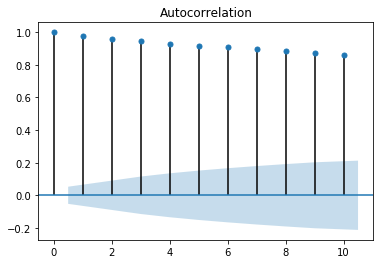

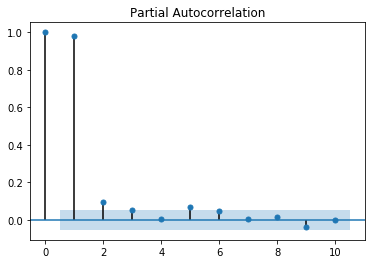

In [175]:
# Check the autocorrelation of TSLA column in order to decide the shift period 
from statsmodels.graphics import tsaplots
ax1=tsaplots.plot_acf(df_tesla.TSLA,lags=10)
ax2=tsaplots.plot_pacf(df_tesla.TSLA,lags=10)

In [160]:
# Shift index axis (axis 0) by 1 period in negative direction
# and name the shifted column as 'Label' to facilitate the following Naive forecast (Linear Regression)
df_tesla['Label']= df_tesla.TSLA.shift(-1)
df_tesla.head(5)

index,TSLA,ROC,Label
Date,,,
2014-12-31,222.410004,NaN,219.309998
2015-01-02,219.309998,NaN,210.089996
2015-01-05,210.089996,NaN,211.279999
2015-01-06,211.279999,NaN,210.949997
2015-01-07,210.949997,NaN,210.619995


In [166]:
#TAKING CLOSE PRICE AND LABEL
Final_tesla=df_tesla[['TSLA','Label']]

In [161]:
#Function for calculating BIAS
def BIAS(df, n):  
    Ct = df.diff(n - 1)  
    MA = pd.Series(df.rolling(n, min_periods=n).mean())  
    BIAS = pd.Series((((Ct-MA) / MA) * 100), name = 'BIAS_' + str(n))   
    return BIAS

In [162]:
df_tesla['BIAS'] = BIAS(df_tesla['TSLA'], 6)
df_tesla.tail(5)

index,TSLA,ROC,Label,BIAS
Date,,,,
2020-06-29,1009.349976,1.511583,1079.810059,-98.474636
2020-06-30,1079.810059,7.789138,1119.630005,-92.193757
2020-07-01,1119.630005,16.524955,1208.660034,-84.421519
2020-07-02,1208.660034,22.584643,1371.579956,-79.002913
2020-07-06,1371.579956,42.911619,NaN,-63.385331


In [163]:
#Replacing Missing Value with mean
df_tesla.fillna(df_tesla.mean(), inplace=True)

# 9. Moving average indicator for buy and sell

In [164]:
# Short term and long term averages setting
short_window = 50
long_window = 100
df_tesla["signal"]=0.0
df_tesla["short"] = df_tesla["TSLA"].rolling(window = short_window, min_periods=1, center=False).mean()
df_tesla["long"] = df_tesla["TSLA"].rolling(window = long_window, min_periods=1, center=False).mean()
df_tesla["signal"][short_window:]=np.where(df_tesla["short"][short_window:]>df_tesla["long"][short_window:],1.0,0.0)
df_tesla["positions"] = df_tesla["signal"].diff()
#print(market_df)

In [165]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_tesla.index,y=df_tesla.TSLA,
                    mode='lines',
                    name='TSLA-Close'))
fig.add_trace(go.Scatter(x=df_tesla.index, y=df_tesla.long,
                    mode='lines',
                    name='long'))
fig.add_trace(go.Scatter(x=df_tesla.index, y=df_tesla.short,
                    mode='lines',
                    name='short'))
fig.add_trace(go.Scatter(
    x=df_tesla.loc[df_tesla.positions == 1.0].index,
    y=df_tesla.short[df_tesla.positions == 1.0],
    marker=dict(color="green",symbol='triangle-up', size=12),
    mode="markers",
    name="Buy"))

fig.add_trace(go.Scatter(
    x=df_tesla.loc[df_tesla.positions == -1.0].index,
    y=df_tesla.long[df_tesla.positions == -1.0],
    marker=dict(color="red",symbol='triangle-down', size=12),
    mode="markers",
    name="Sell"))



fig.show()

# 10. Naive forecast with closing price as input
Naive forecast: Estimating technique in which the last period's actuals are used as this period's forecast, without adjusting them or attempting to establish causal factors. 

In [341]:
x_model1=np.array(Final_tesla.drop(['Label'],1))
y_model1=np.array(Final_tesla['Label'])
y_model1=y_model1.reshape(-1,1)


In [342]:
y_model1.shape

(1387, 1)

In [343]:
#STANDARD SCALING
from sklearn import preprocessing
Scaler = preprocessing.StandardScaler().fit(y_model1)
x_model1= Scaler.transform(x_model1)
y_model1=Scaler.transform(y_model1)

In [ ]:
#SPLITING THE DATA INTO 80% train AND 20% test
from sklearn.model_selection import cross_val_score
# x_train, x_test, y_train, y_test = train_test_split(x_model1, y_model1, test_size = .33)

#FITING INTO REGERESSION WITH LINEARREGRESSION LIBRARY
from sklearn.linear_model import Ridge
regressor_model1 = Ridge(alpha=0.001)
regressor_model1.fit(x_model1, y_model1)
print(cross_val_score(regressor_model1,x_model1, y_model1,cv=5))

# print(cross_val_score(regressor_model1,x_test,y_test,cv=5))
# y_pred=regressor_model1.predict(x_test)
# print(f'R2 score of train set: {regressor_model1.score(x_train,y_train)}')
# print(f'R2 score of test set: {regressor_model1.score(x_test,y_test)}')
# print(f'Coefficient: {regressor_model1.coef_}')
# print(f'Intercept: {regressor_model1.intercept_}')

In [ ]:
### This model is naive but looks like a good one, accutally beyond our expectation.
<img src="naive forecast.png" width=500/>

In [171]:
#Forecast based on x_test
forecast_model1=regressor_model1.predict(x_test)

In [172]:
#restranform the scaled data to original data
new_shape=np.array(Scaler.inverse_transform(forecast_model1)).reshape(1,-1)[0]
test1=pd.Series(new_shape)
new_shape2=np.array(Scaler.inverse_transform(y_test)).reshape(1,-1)[0]
test2=pd.Series(new_shape2)
test_data=pd.DataFrame()
test_data=pd.concat([test2,test1], axis=1)
test_data.columns=['True Price','Predicted Price']
test_data.head()

,True Price,Predicted Price
0,254.679993,257.207445
1,355.679993,353.785628
2,284.730011,292.456236
3,197.580002,201.720346
4,188.770004,193.800589


In [173]:
test_data['Signal']=(test_data['Predicted Price']-test_data['True Price']).dropna()
test_data['Signal']=np.sign(test_data['Signal']).dropna()
test_data.head()

,True Price,Predicted Price,Signal
0,254.679993,257.207445,1.0
1,355.679993,353.785628,-1.0
2,284.730011,292.456236,1.0
3,197.580002,201.720346,1.0
4,188.770004,193.800589,1.0


# Thank you!